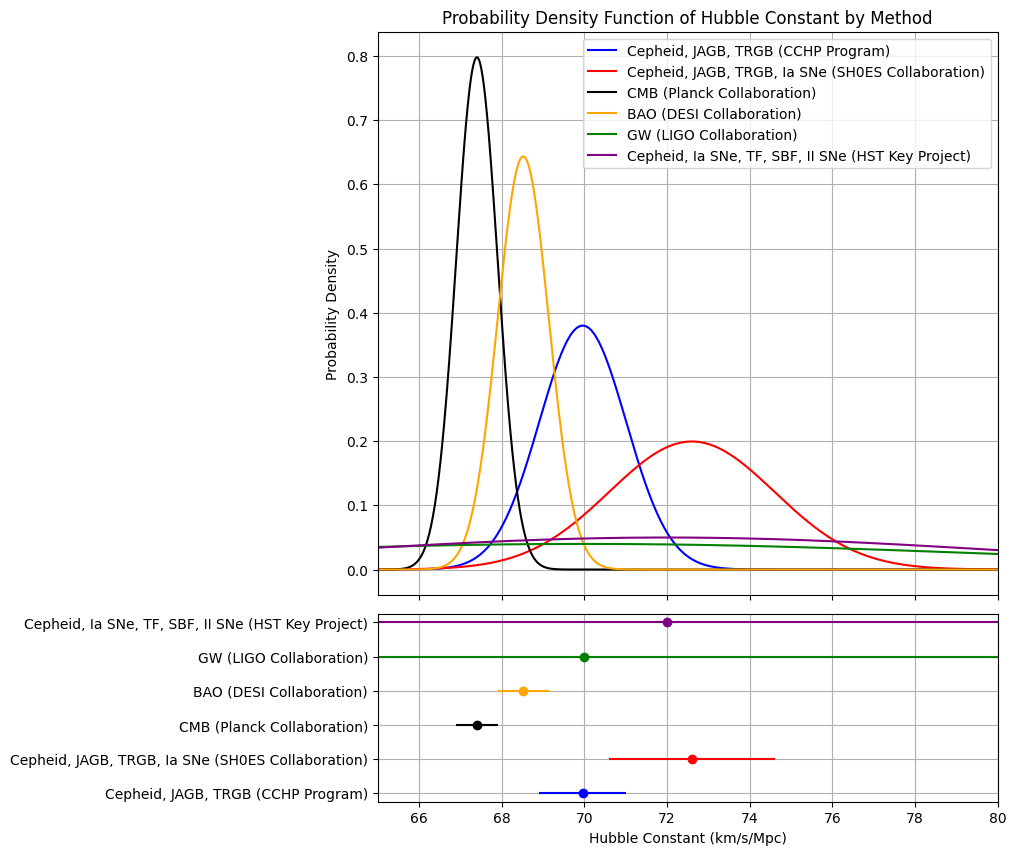

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import os

# Given data
values = [69.96, 72.6, 67.4, 68.52, 70.0, 72.0]
errors = [1.05, 2.0, 0.5, 0.62, 10.0, 8.0]
methods = ['Cepheid, JAGB, TRGB', 'Cepheid, JAGB, TRGB, Ia SNe', 'CMB', 'BAO', 'GW', 'Cepheid, Ia SNe, TF, SBF, II SNe']
author = ['CCHP Program', 'SH0ES Collaboration', 'Planck Collaboration', 'DESI Collaboration', 'LIGO Collaboration', 'HST Key Project']

# Define colors for different methods
colors = {'Cepheid, JAGB, TRGB': 'blue',
          'Cepheid, JAGB, TRGB, Ia SNe': 'red',
          'CMB': 'black',
          'BAO': 'orange',
          'GW': 'green',
          'Cepheid, Ia SNe, TF, SBF, II SNe': 'purple'}

# Create a range of Hubble constant values
x_range = np.linspace(65, 80, 1000)

# Create subplots with shared x-axis and minimal vertical spacing
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 10), gridspec_kw={'height_ratios': [3, 1], 'hspace': 0.05})

# Plot the probability density function (PDF) for each method on the first axis
for i, method in enumerate(methods):
    mean = values[i]
    std_dev = errors[i]
    pdf = norm.pdf(x_range, mean, std_dev)
    ax1.plot(x_range, pdf, color=colors[method], label=f'{method} ({author[i]})')

# Customize the PDF plot
ax1.set_ylabel("Probability Density")
ax1.set_title("Probability Density Function of Hubble Constant by Method")
ax1.legend()
ax1.grid(True)

# Plot the scatter plot with error bars on the second axis
for i, method in enumerate(methods):
    ax2.errorbar(values[i], i, xerr=errors[i], fmt='o', color=colors[method], label=method)

# Customize the scatter plot
ax2.set_yticks(range(len(methods)))
ax2.set_yticklabels([f"{method} ({author[i]})" for i, method in enumerate(methods)])
ax2.set_xlabel("Hubble Constant (km/s/Mpc)")
ax2.set_xlim(65, 80)
ax2.grid(True)

# Show the plot
plt.show()

<unknown>:77: SyntaxWarning: invalid escape sequence '\,'
<>:77: SyntaxWarning: invalid escape sequence '\,'
<>:77: SyntaxWarning: invalid escape sequence '\,'
<ipython-input-9-95113f45d252>:77: SyntaxWarning: invalid escape sequence '\,'
  ax2.set_xlabel('Hubble Constant $km \, s^{-1} \, Mpc^{-1}$')
<ipython-input-9-95113f45d252>:77: SyntaxWarning: invalid escape sequence '\,'
  ax2.set_xlabel('Hubble Constant $km \, s^{-1} \, Mpc^{-1}$')


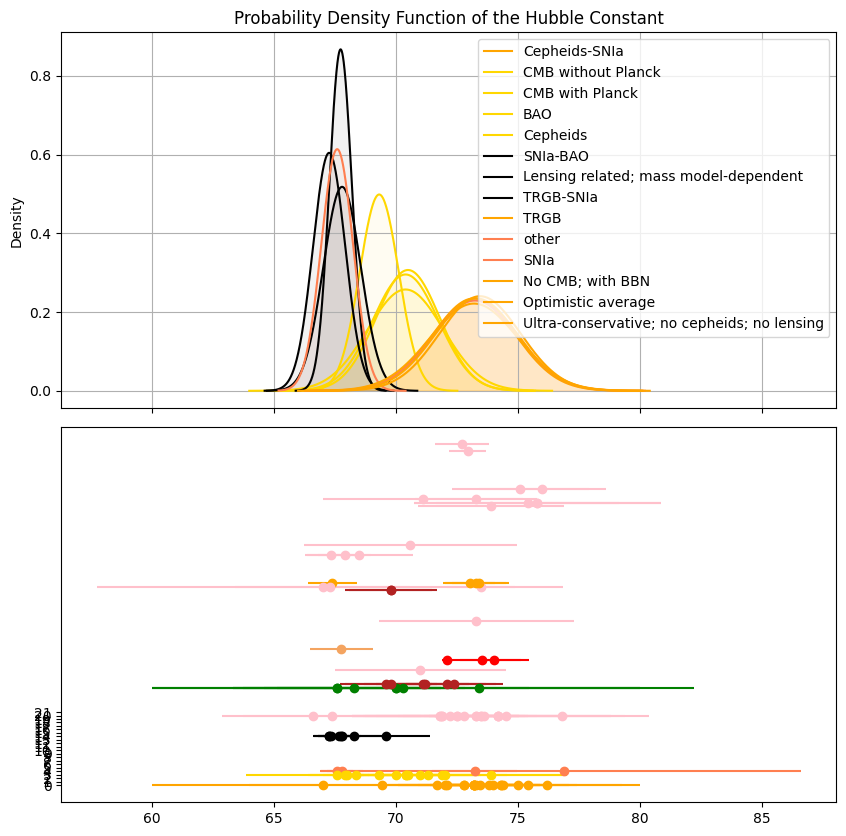

<class 'ValueError'>: The number of FixedLocator locations (22), usually from a call to set_ticks, does not match the number of ticklabels (110).

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import os

# Define the path to your dataset
# dirpath = os.path.dirname(os.path.abspath(__doc__))
# data_path = dirpath + '/ICE_FASE2JiC/dataset.csv'

# Load data
df = pd.read_csv("./dataset.csv")
means = df['Value']
std_dev_lows = df['Lower']
std_dev_highs = df['Upper']
types = df['Type']
colors = list(types.replace({
    'Cepheids':'red', 'Cepheids-SNIa':'orange', 'CMB with Planck':'black', 'CMB without Planck':'gold',
    'GW related':'green', 'HII galaxies':'pink', 'Lensing related; mass model-dependent':'pink',
    'Masers':'pink', 'Miras-SNIa':'pink', 'No CMB; with BBN':'pink', 'Optimistic average':'pink',
    'Pl(k) + CMB lensing':'pink', 'SNII':'pink', 'Surface Brightness Fluctuations':'pink', 
    'TRGB-SNIa':'firebrick', 'Tully-Fisher Relation':'pink', 'Ultra-conservative; no cepheids; no lensing':'pink',
    'BAO':'coral', 'SNIa-BAO':'sandybrown', 'other':'pink', 'SNIa':'orange', 'TRGB':'firebrick'
}))

# Separate lists for the PDF and scatter plot data
x_data = []
y_data = []
color_data = []
label_data = []
scatter_means = []
scatter_errors = []
scatter_colors = []
scatter_labels = []

# Collect data for PDF and scatter plots
for mean, std_dev_low, std_dev_high, color, this_type in zip(means, std_dev_lows, std_dev_highs, colors, types):
    # Generate range of values around the mean for PDF
    x = np.linspace(mean - 4*std_dev_low, mean + 4*std_dev_high, 1000)
    pdf = norm.pdf(x, loc=mean, scale=(std_dev_low + std_dev_high) / 2)
    
    # Add to PDF plot data if the error bounds are small
    if std_dev_high < 2 or std_dev_low < 2:
        x_data.append(x)
        y_data.append(pdf)
        color_data.append(color)
        if this_type not in label_data:
            label_data.append(this_type)
    
    # Add to scatter plot data
    scatter_means.append(mean)
    scatter_errors.append((std_dev_low + std_dev_high) / 2)
    scatter_colors.append(color)
    scatter_labels.append(this_type)

# Create subplots with shared x-axis and minimal vertical spacing
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 10), gridspec_kw={'height_ratios': [1, 1], 'hspace': 0.05})

# Plot the PDF for each method on the first axis
for x, y, color, label in zip(x_data, y_data, color_data, label_data):
    ax1.plot(x, y, color=color, label=label)
    ax1.fill_between(x, y, color=color, alpha=0.05)

# Customize the PDF plot
ax1.set_title('Probability Density Function of the Hubble Constant')
ax1.set_ylabel('Density')
ax1.legend()
ax1.grid(True)

# Plot the scatter plot with error bars on the second axis
for mean, error, color, label in zip(scatter_means, scatter_errors, scatter_colors, scatter_labels):
    ax2.errorbar(mean, scatter_labels.index(label), xerr=error, fmt='o', color=color, label=label)

# Customize the scatter plot
ax2.set_yticks(range(len(set(scatter_labels))))
ax2.set_yticklabels([f"{label}" for label in scatter_labels])
ax2.set_xlabel('Hubble Constant $km \, s^{-1} \, Mpc^{-1}$')
ax2.grid(True)

# Save and show the plots
plt.savefig(f'{dirpath}/H0pdf.png')
plt.show()